<a href="https://colab.research.google.com/github/dead96pool/stress_detection_mlai/blob/main/MLAI_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [28]:
import pandas as pd
import numpy as np
import glob
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import accuracy_score

from sklearn.preprocessing import StandardScaler, MinMaxScaler
from tensorflow.keras.models import Sequential
from keras.models import Sequential
from keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

from sklearn.model_selection import GridSearchCV
# To gbm light
from lightgbm import LGBMClassifier
from sklearn.decomposition import PCA


# Data cleaning

In [3]:
# git repo clone
!git clone https://github.com/dead96pool/datasets
# removing the clone
#!rm -rf datasets

Cloning into 'datasets'...
remote: Enumerating objects: 2817, done.
remote: Counting objects: 100% (1402/1402), done.
remote: Compressing objects: 100% (1388/1388), done.
remote: Total 2817 (delta 10), reused 1401 (delta 9), pack-reused 1415
Receiving objects: 100% (2817/2817), 65.32 MiB | 31.73 MiB/s, done.
Resolving deltas: 100% (11/11), done.
Filtering content: 100% (1357/1357), 853.65 MiB | 21.01 MiB/s, done.


In [4]:
calm_path = "/content/datasets/machine_learning/mlai_project/2019_stress_detection_dataset/CALM/"
stress_path = "/content/datasets/machine_learning/mlai_project/2019_stress_detection_dataset/STRESS/"

In [5]:
column_names = [
    'participant_id', 'age', 'gender', 'key_press_count', 'delete_key_press_count',
    'text_id', 'text_length', 'accelerometer_x', 'accelerometer_y', 'accelerometer_z',
    'accelerometer_magnitude', 'gravity_x', 'gravity_y', 'gravity_z', 'gravity_magnitude',
    'linear_acceleration_x', 'linear_acceleration_y', 'linear_acceleration_z',
    'linear_acceleration_magnitude',
    'gyroscope_x', 'gyroscope_y', 'gyroscope_z', 'gyroscope_magnitude',
    'magnetometer_x', 'magnetometer_y', 'magnetometer_z', 'magnetometer_magnitude',
    'light_sensor', 'proximity_sensor',
    'game_rotation_vector_x', 'game_rotation_vector_y', 'game_rotation_vector_z',
    'game_rotation_vector_magnitude',
    'rotation_sensor_x', 'rotation_sensor_y', 'rotation_sensor_z', 'rotation_sensor_scalar',
    'rotation_sensor_value',
    'rotation_sensor_magnitude',
    'orientation_azimuth', 'orientation_pitch', 'orientation_roll', 'orientation_sensor_magnitude',
    'number_of_steps'
]

In [6]:
# looping throught the calm folder to combine all the CALM files
calm_pattern = calm_path + "CALM_*_2.csv"
calm_files = glob.glob(calm_pattern)

calm_df = []

for file in calm_files:
    df = pd.read_csv(file, sep=';', names=column_names, usecols=range(44))
    calm_df.append(df)


In [7]:
# looping throught the calm folder to combine all the STRESS files
stress_pattern = stress_path + "STRESS_*_2.csv"
stress_files = glob.glob(stress_pattern)

stress_df = []

for file in calm_files:
    df = pd.read_csv(file, sep=';', names=column_names, usecols=range(44))
    stress_df.append(df)


In [8]:

# combining all the calm files
calm_combine_df = pd.concat(calm_df, axis=0, ignore_index= True)

In [9]:

# combining all the stress files
stress_combine_df = pd.concat(stress_df, axis=0, ignore_index= True)

In [10]:
# 0 is calm
# 1 is stressed
calm_combine_df["stress"] = 0
stress_combine_df["stress"] = 1

In [11]:

display(calm_combine_df.sort_values(by='participant_id'))

,participant_id,age,gender,key_press_count,delete_key_press_count,text_id,text_length,accelerometer_x,accelerometer_y,accelerometer_z,...,rotation_sensor_z,rotation_sensor_scalar,rotation_sensor_value,rotation_sensor_magnitude,orientation_azimuth,orientation_pitch,orientation_roll,orientation_sensor_magnitude,number_of_steps,stress
17767,1,30,Male,50,5,2,47,-0.979923,4.663700,8.773359,...,-0.315101,0.908425,0.174533,1.015117,36.365570,-28.843357,-7.180204,46.967537,14.0,0
17418,1,30,Male,21,0,2,47,-1.872126,5.606165,7.378550,...,-0.293177,0.902049,0.174533,1.015117,32.765260,-35.328617,-10.556442,49.326584,14.0,0
17417,1,30,Male,21,0,2,47,-1.786407,5.581447,8.246165,...,-0.296317,0.902351,0.174533,1.015117,32.765260,-35.328617,-10.556442,49.326584,14.0,0
17416,1,30,Male,21,0,2,47,-1.786407,5.581447,8.246165,...,-0.296317,0.902351,0.174533,1.015117,32.765260,-35.328617,-10.556442,49.326584,14.0,0
17415,1,30,Male,21,0,2,47,-1.654066,5.544407,7.404242,...,-0.296317,0.902351,0.174533,1.015117,33.051025,-35.159950,-10.413742,49.366367,14.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27355,110,21,Male,46,2,2,47,1.089395,9.004868,4.031959,...,0.587236,0.612766,0.000000,0.999999,271.460660,-63.714860,2.797799,278.851780,0.0,0
27354,110,21,Male,46,2,2,47,1.094184,8.923462,4.403071,...,0.588232,0.612127,0.000000,0.999999,271.383600,-63.687347,2.571143,278.768280,0.0,0
27353,110,21,Male,46,2,2,47,1.094184,8.923462,4.403071,...,0.588232,0.612127,0.000000,0.999999,271.383600,-63.687347,2.571143,278.768280,0.0,0
27351,110,21,Male,46,2,2,47,0.653637,8.784595,4.994457,...,0.594321,0.607732,0.000000,0.999999,270.605100,-63.503600,1.934910,277.963260,0.0,0


In [12]:
display(stress_combine_df.sort_values(by='participant_id'))

,participant_id,age,gender,key_press_count,delete_key_press_count,text_id,text_length,accelerometer_x,accelerometer_y,accelerometer_z,...,rotation_sensor_z,rotation_sensor_scalar,rotation_sensor_value,rotation_sensor_magnitude,orientation_azimuth,orientation_pitch,orientation_roll,orientation_sensor_magnitude,number_of_steps,stress
17767,1,30,Male,50,5,2,47,-0.979923,4.663700,8.773359,...,-0.315101,0.908425,0.174533,1.015117,36.365570,-28.843357,-7.180204,46.967537,14.0,1
17418,1,30,Male,21,0,2,47,-1.872126,5.606165,7.378550,...,-0.293177,0.902049,0.174533,1.015117,32.765260,-35.328617,-10.556442,49.326584,14.0,1
17417,1,30,Male,21,0,2,47,-1.786407,5.581447,8.246165,...,-0.296317,0.902351,0.174533,1.015117,32.765260,-35.328617,-10.556442,49.326584,14.0,1
17416,1,30,Male,21,0,2,47,-1.786407,5.581447,8.246165,...,-0.296317,0.902351,0.174533,1.015117,32.765260,-35.328617,-10.556442,49.326584,14.0,1
17415,1,30,Male,21,0,2,47,-1.654066,5.544407,7.404242,...,-0.296317,0.902351,0.174533,1.015117,33.051025,-35.159950,-10.413742,49.366367,14.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27355,110,21,Male,46,2,2,47,1.089395,9.004868,4.031959,...,0.587236,0.612766,0.000000,0.999999,271.460660,-63.714860,2.797799,278.851780,0.0,1
27354,110,21,Male,46,2,2,47,1.094184,8.923462,4.403071,...,0.588232,0.612127,0.000000,0.999999,271.383600,-63.687347,2.571143,278.768280,0.0,1
27353,110,21,Male,46,2,2,47,1.094184,8.923462,4.403071,...,0.588232,0.612127,0.000000,0.999999,271.383600,-63.687347,2.571143,278.768280,0.0,1
27351,110,21,Male,46,2,2,47,0.653637,8.784595,4.994457,...,0.594321,0.607732,0.000000,0.999999,270.605100,-63.503600,1.934910,277.963260,0.0,1


In [13]:
print(calm_combine_df.isnull().sum().sum())
print(calm_combine_df.info())

0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86545 entries, 0 to 86544
Data columns (total 45 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   participant_id                  86545 non-null  int64  
 1   age                             86545 non-null  int64  
 2   gender                          86545 non-null  object 
 3   key_press_count                 86545 non-null  int64  
 4   delete_key_press_count          86545 non-null  int64  
 5   text_id                         86545 non-null  int64  
 6   text_length                     86545 non-null  int64  
 7   accelerometer_x                 86545 non-null  float64
 8   accelerometer_y                 86545 non-null  float64
 9   accelerometer_z                 86545 non-null  float64
 10  accelerometer_magnitude         86545 non-null  float64
 11  gravity_x                       86545 non-null  float64
 12  gravity_y                     

In [14]:
# finding unique participant values
print(sorted(calm_combine_df["participant_id"].unique()))
print(len(calm_combine_df["participant_id"].unique()))

print(sorted(stress_combine_df["participant_id"].unique()))
print(len(stress_combine_df["participant_id"].unique()))

print(sorted(calm_combine_df["stress"].unique()))
print(len(calm_combine_df["stress"].unique()))

print(sorted(stress_combine_df["stress"].unique()))
print(len(stress_combine_df["stress"].unique()))

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110]
109
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110]
109
[0]
1
[1]
1


In [15]:
print(stress_combine_df.isnull().sum().sum())
print(stress_combine_df.info())

0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86545 entries, 0 to 86544
Data columns (total 45 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   participant_id                  86545 non-null  int64  
 1   age                             86545 non-null  int64  
 2   gender                          86545 non-null  object 
 3   key_press_count                 86545 non-null  int64  
 4   delete_key_press_count          86545 non-null  int64  
 5   text_id                         86545 non-null  int64  
 6   text_length                     86545 non-null  int64  
 7   accelerometer_x                 86545 non-null  float64
 8   accelerometer_y                 86545 non-null  float64
 9   accelerometer_z                 86545 non-null  float64
 10  accelerometer_magnitude         86545 non-null  float64
 11  gravity_x                       86545 non-null  float64
 12  gravity_y                     

In [16]:
# combining the stress and the calm dataframes together

combined_df = pd.concat([calm_combine_df, stress_combine_df], ignore_index = True, axis = 0)

In [17]:
display(combined_df.sort_values(by="participant_id"))

,participant_id,age,gender,key_press_count,delete_key_press_count,text_id,text_length,accelerometer_x,accelerometer_y,accelerometer_z,...,rotation_sensor_z,rotation_sensor_scalar,rotation_sensor_value,rotation_sensor_magnitude,orientation_azimuth,orientation_pitch,orientation_roll,orientation_sensor_magnitude,number_of_steps,stress
103928,1,30,Male,18,0,2,47,-2.125065,5.515527,7.688008,...,-0.296112,0.901758,0.174533,1.015117,32.777283,-35.170370,-11.263405,49.377823,14.0,1
104322,1,30,Male,50,5,2,47,-1.445625,2.941678,8.064647,...,-0.300249,0.930175,0.174533,1.015117,33.842834,-22.480270,-9.719546,41.775227,14.0,1
104323,1,30,Male,50,5,2,47,-1.907512,4.099217,8.314449,...,-0.302832,0.927518,0.174533,1.015117,33.842834,-22.480270,-9.719546,41.775227,14.0,1
104324,1,30,Male,50,5,2,47,-1.907512,4.099217,8.314449,...,-0.302832,0.927518,0.174533,1.015117,34.140230,-23.490053,-9.708879,42.562897,14.0,1
104325,1,30,Male,50,5,2,47,-1.490115,3.842383,8.665605,...,-0.302832,0.927518,0.174533,1.015117,34.140230,-23.490053,-9.708879,42.562897,14.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113661,110,21,Male,26,2,2,47,0.215485,8.976136,4.371946,...,0.595939,0.592739,0.000000,0.999998,268.847600,-65.499190,2.380671,276.721600,0.0,1
113662,110,21,Male,26,2,2,47,0.414210,9.050359,4.043930,...,0.594573,0.593767,0.000000,0.999999,269.059360,-65.545654,2.432769,276.938780,0.0,1
113663,110,21,Male,26,2,2,47,0.414210,9.050359,4.043930,...,0.594573,0.593767,0.000000,0.999999,269.059360,-65.545654,2.432769,276.938780,0.0,1
113665,110,21,Male,26,2,2,47,1.039115,9.098245,3.826051,...,0.596805,0.592861,0.000000,0.999999,268.753940,-65.345820,2.446049,276.594900,0.0,1


In [18]:
# Encode the 'gender' column using LabelEncoder
enc = LabelEncoder()
combined_df['gender'] = enc.fit_transform(combined_df['gender'])


In [19]:
# Print the mapping between original categorical values and numerical labels
print("Mapping of original values to numerical labels:")
for original_value, numerical_label in zip(enc.classes_, enc.transform(enc.classes_)):
    print(f"{original_value}: {numerical_label}")

Mapping of original values to numerical labels:
Female: 0
Male: 1


In [20]:
display(combined_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 173090 entries, 0 to 173089
Data columns (total 45 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   participant_id                  173090 non-null  int64  
 1   age                             173090 non-null  int64  
 2   gender                          173090 non-null  int64  
 3   key_press_count                 173090 non-null  int64  
 4   delete_key_press_count          173090 non-null  int64  
 5   text_id                         173090 non-null  int64  
 6   text_length                     173090 non-null  int64  
 7   accelerometer_x                 173090 non-null  float64
 8   accelerometer_y                 173090 non-null  float64
 9   accelerometer_z                 173090 non-null  float64
 10  accelerometer_magnitude         173090 non-null  float64
 11  gravity_x                       173090 non-null  float64
 12  gravity_y       

None

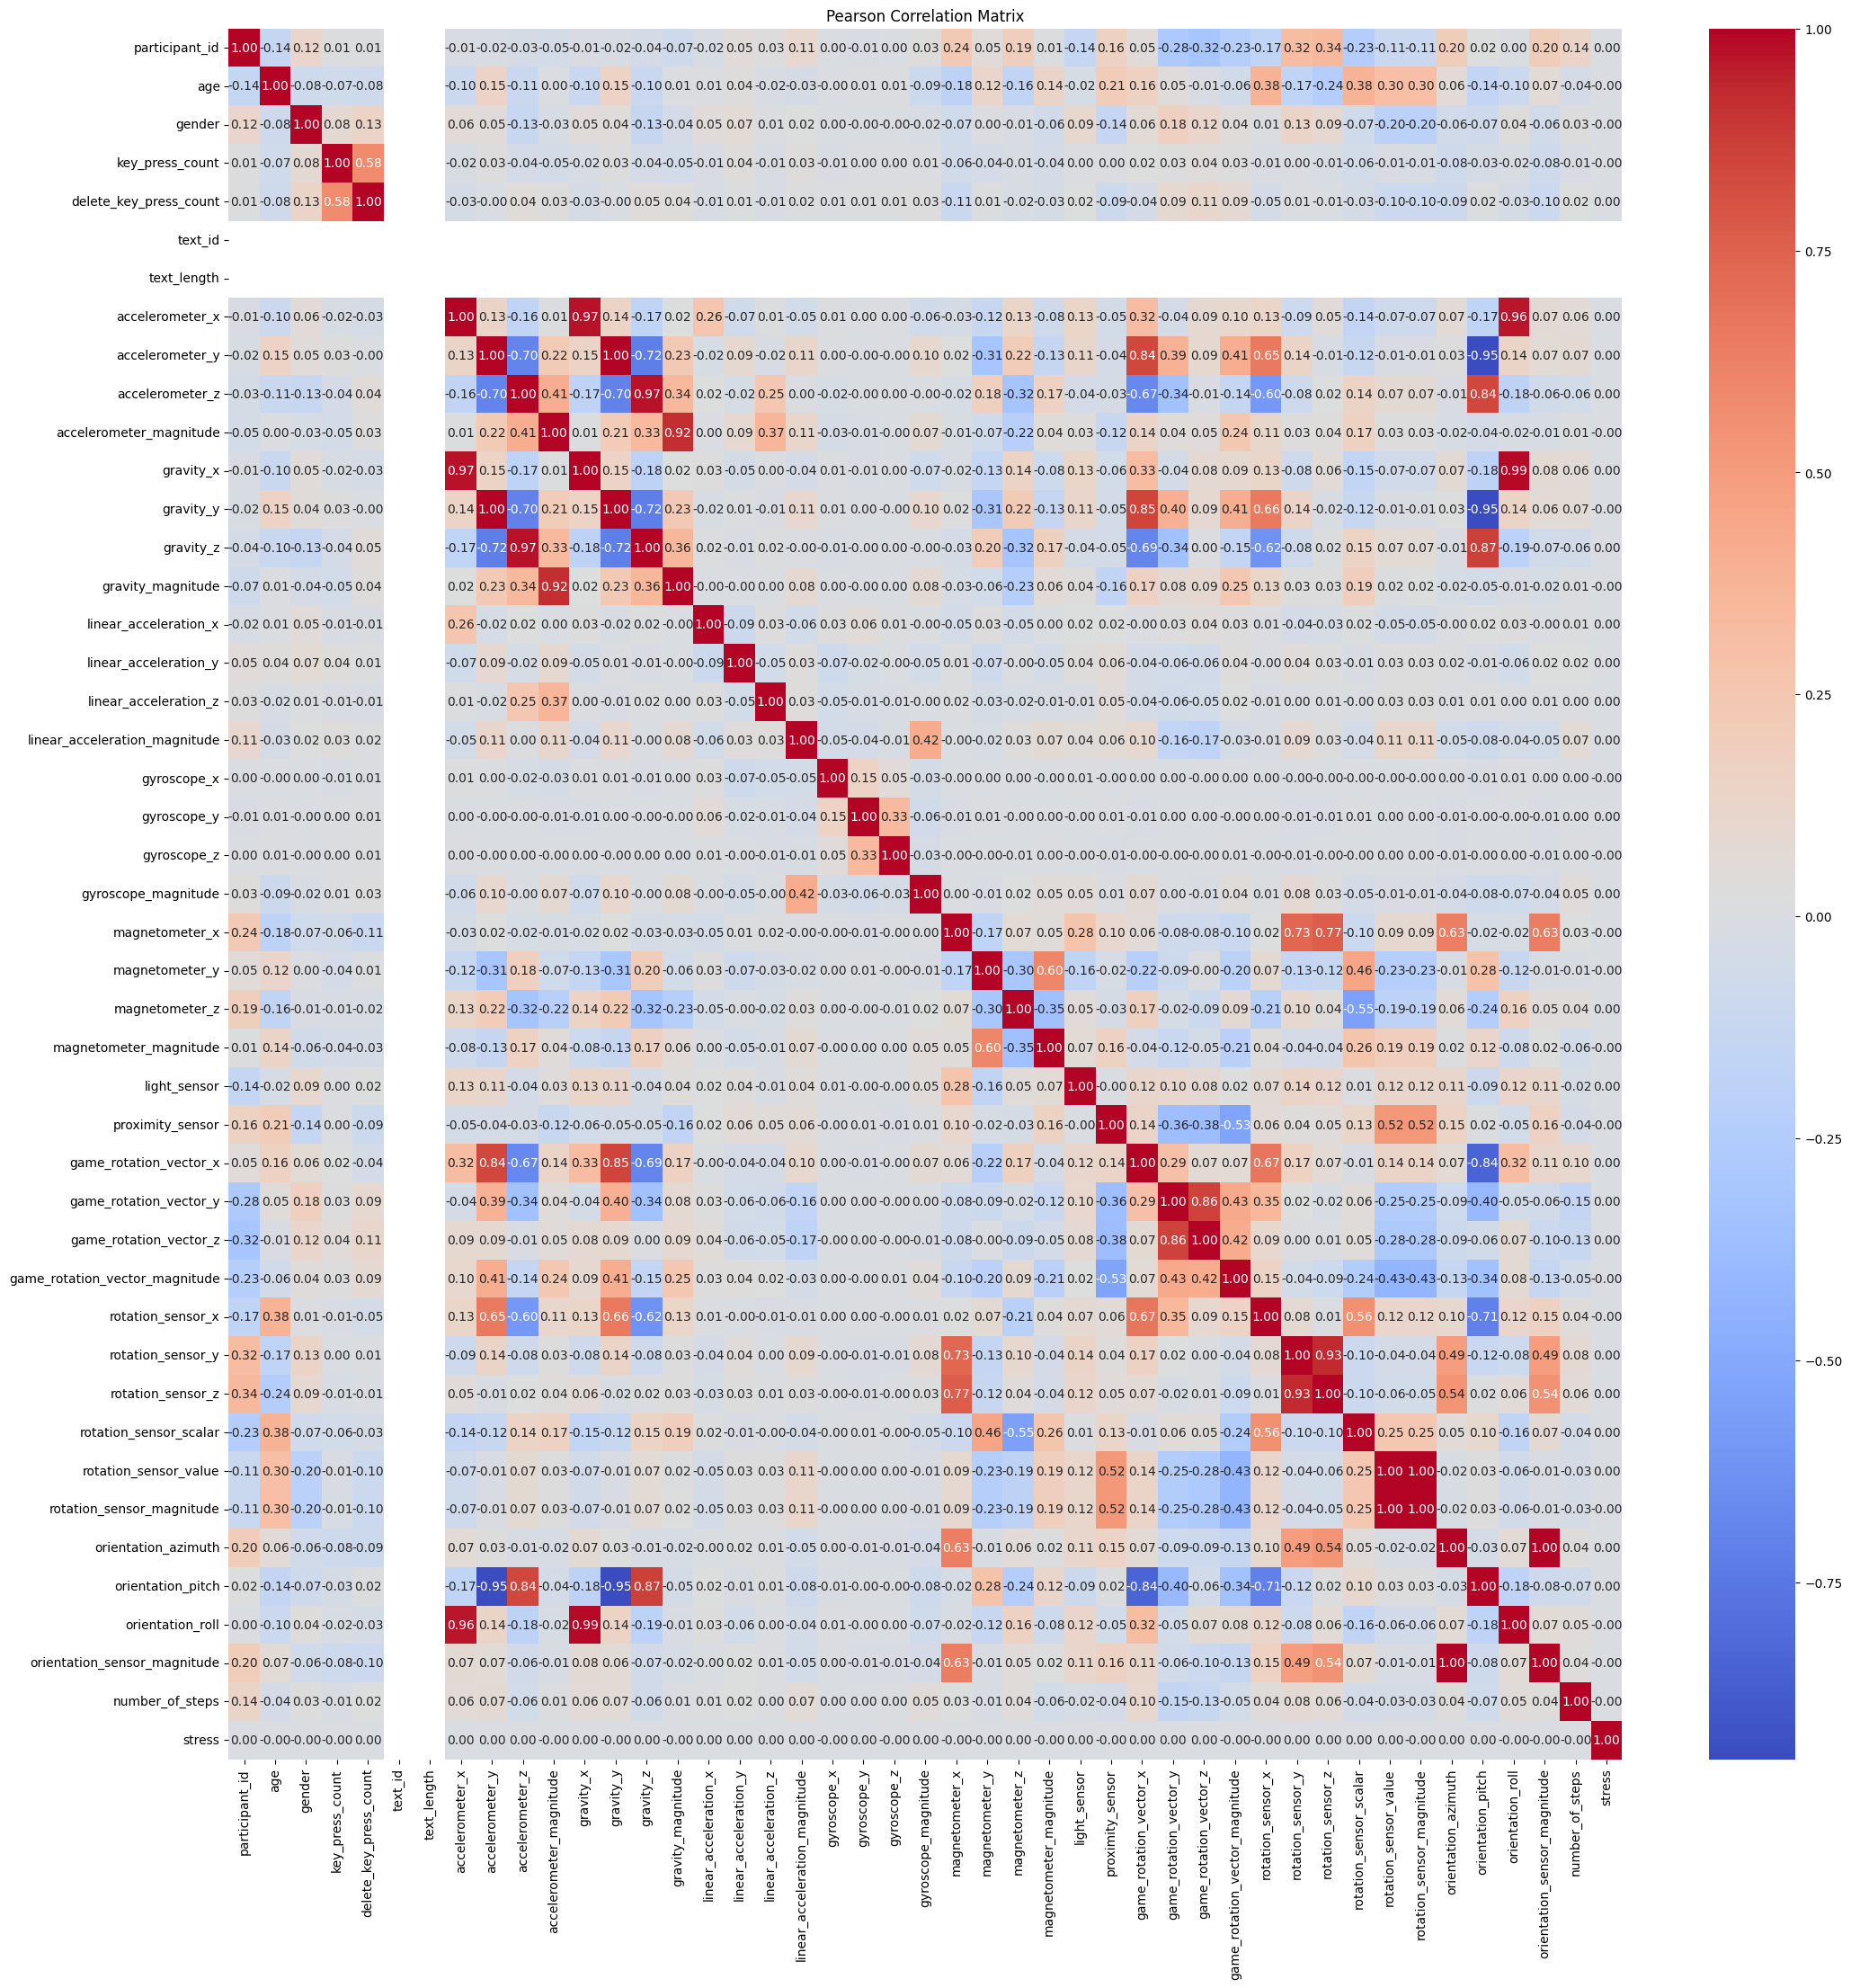

In [21]:
# pearse correlation matrix
correlation_matrix = combined_df.corr()

# Set up the matplotlib figure
plt.figure(figsize=(25, 25))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")

# Add title
plt.title('Pearson Correlation Matrix')

# Show plot
plt.show()

# ML model

In [22]:
# spliting target class
X = combined_df.drop(['stress', 'gender', 'participant_id'], axis=1)  # Features
y = combined_df['stress']  # Target variable


In [23]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42, stratify = y)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size = 0.1, random_state = 42, stratify = y_train)

split_shape = {"TRAINING": [X_train.shape,y_train.shape],
               "VALIDATING": [X_val.shape, y_val.shape],
               "TESTING": [X_test.shape, y_test.shape]}

split_shape_df = pd.DataFrame(split_shape, index=["X shape", "y shape"])
display(split_shape_df)

,TRAINING,VALIDATING,TESTING
X shape,"(124624, 42)","(13848, 42)","(34618, 42)"
y shape,"(124624,)","(13848,)","(34618,)"


In [24]:
# PCA

pca = PCA(n_components=0.8)  # Choose the number of components to explain 95% of the variance
X_train_pca = pca.fit_transform(X_train)
X_val_pca = pca.transform(X_val)
X_test_pca = pca.transform(X_test)

In [25]:
# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_pca)
X_val_scaled = scaler.transform(X_val_pca)
X_test_scaled = scaler.transform(X_test_pca)

In [26]:
print(X_train_pca.shape, X_train_scaled.shape)

(124624, 1) (124624, 1)


# FNN

In [35]:
model = Sequential()
model.add(Dense(units=128, kernel_initializer='normal', activation='relu', input_dim=X_train_scaled.shape[1]))
model.add(Dropout(0.2))  # Regularization
model.add(Dense(units=64, kernel_initializer='normal', activation='relu'))
model.add(Dense(units=32, kernel_initializer='normal', activation='relu'))
model.add(Dense(units=1, kernel_initializer='normal', activation='sigmoid'))  # Sigmoid activation for binary classification

# Compile the model with sparse_categorical_crossentropy
model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train_scaled, y_train, batch_size=64, epochs=10, validation_data=(X_test_scaled, y_test))

Epoch 1/10
1948/1948 [==============================] - 61s 3ms/step - loss: 0.6932 - accuracy: 0.4989 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 2/10
1948/1948 [==============================] - 7s 4ms/step - loss: 0.6932 - accuracy: 0.4988 - val_loss: 0.6932 - val_accuracy: 0.4988
Epoch 3/10
1948/1948 [==============================] - 6s 3ms/step - loss: 0.6932 - accuracy: 0.5011 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 4/10
1948/1948 [==============================] - 8s 4ms/step - loss: 0.6932 - accuracy: 0.4973 - val_loss: 0.6932 - val_accuracy: 0.4984
Epoch 5/10
1948/1948 [==============================] - 6s 3ms/step - loss: 0.6932 - accuracy: 0.4969 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 6/10
1948/1948 [==============================] - 7s 3ms/step - loss: 0.6932 - accuracy: 0.4986 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 7/10
1948/1948 [==============================] - 7s 3ms/step - loss: 0.6932 - accuracy: 0.5011 - val_loss: 0.6932 - val_accuracy

In [29]:
# Train the model
history = model.fit(X_train_scaled, y_train, epochs=20, batch_size=32, validation_data=(X_val_scaled, y_val))


Epoch 1/20
3895/3895 [==============================] - 9s 2ms/step - loss: 0.6943 - accuracy: 0.5020 - val_loss: 0.6932 - val_accuracy: 0.5002
Epoch 2/20
3895/3895 [==============================] - 9s 2ms/step - loss: 0.6942 - accuracy: 0.5008 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 3/20
3895/3895 [==============================] - 9s 2ms/step - loss: 0.6942 - accuracy: 0.4994 - val_loss: 0.6932 - val_accuracy: 0.5006
Epoch 4/20
3895/3895 [==============================] - 9s 2ms/step - loss: 0.6939 - accuracy: 0.4994 - val_loss: 0.6938 - val_accuracy: 0.5000
Epoch 5/20
3895/3895 [==============================] - 9s 2ms/step - loss: 0.6938 - accuracy: 0.5002 - val_loss: 0.6943 - val_accuracy: 0.5000
Epoch 6/20
3895/3895 [==============================] - 9s 2ms/step - loss: 0.6938 - accuracy: 0.4988 - val_loss: 0.6934 - val_accuracy: 0.5000
Epoch 7/20
3895/3895 [==============================] - 8s 2ms/step - loss: 0.6939 - accuracy: 0.4983 - val_loss: 0.6939 - val_accuracy:

KeyboardInterrupt: 

1082/1082 [==============================] - 2s 2ms/step - loss: 0.6932 - accuracy: 0.5000
Test Loss: 0.6931617856025696, Test Accuracy: 0.5


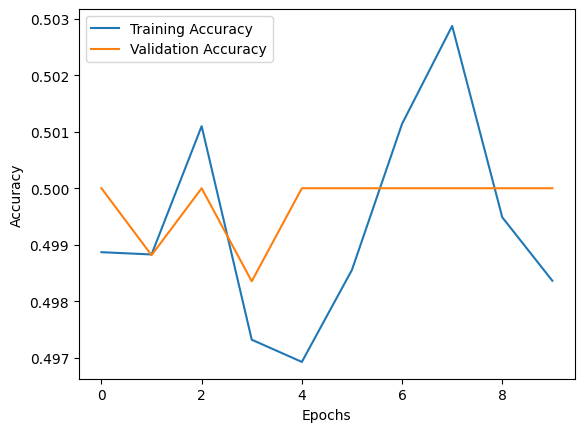

In [36]:
# Evaluate the model
loss, accuracy = model.evaluate(X_test_scaled, y_test)
print(f'Test Loss: {loss}, Test Accuracy: {accuracy}')

plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# LGBM

In [37]:
lgbm = LGBMClassifier(n_estimators=500, random_state=42)

lgbm.fit(X_train_scaled, y_train)


[LightGBM] [Info] Number of positive: 62312, number of negative: 62312
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001986 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 255
[LightGBM] [Info] Number of data points in the train set: 124624, number of used features: 1
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


LGBMClassifier(n_estimators=500, random_state=42)

In [38]:
# Make predictions
y_test_pred = lgbm.predict(X_test_scaled)

In [39]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_test_pred)
print("Validation Accuracy:", accuracy)

Validation Accuracy: 0.4711132936622566
